In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# 차트의 한글 깨짐 방지를 위한 코드 추가

from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

# 앙상블
여러 머신러닝 모델을 연결해 더 강력한 모델을 만드는 기법
- 랜덤 포레스트(random forest) 
- 그래디언트 부스팅(gradient boosting)

## 랜덤 포레스트
결정 트리의 단점인 과대적합을 회피할 수 있는 방법.<br>
잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로서 과대적합된 양을 줄일 수 있음

각각의 트리는 타깃을 잘 예측해야하면서도 다른 트리와는 구분되어야함. 트리를 랜덤하게 만드는 방법은 두 가지인데 
- 데이터 포인트를 무작위로 선택하는 방법
- 분할 테스트에서 특성을 무작위로 선택하는 방법

### 구축
n_estimators(기본값은 10) : 생성할 트리의 개수 정함<br>
무작위적인 트리를 만들기 위해 데이터의 부트스트랩 샘플(bootstrap sample)을 생성<br>
ie) n_samples개의 포인트 중 무작위로 데이터를 n_samples 횟수만큼 반복 추출->어떤 포인트는 누락될 수도 있고 중복될 수도 있음

만들어진 데이터셋으로 결정 트리를 만듦. 결정 트리 알고리즘과 약간 다르게 최선의 테스트를 찾는 것이 아니고 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중 최선의 테스트를 찾는다. 몇 개의 특성을 고를지는 max_features 매개변수로 조정

max_features의 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 맞춰질 것,<br>
max_features를 낮추면 랜덤 포레스트 트리들이 많아 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 된다.

### 분석

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y =  make_moons(n_samples=100, noise=0.25, random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [10]:
forest = RandomForestClassifier(n_estimators=8,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

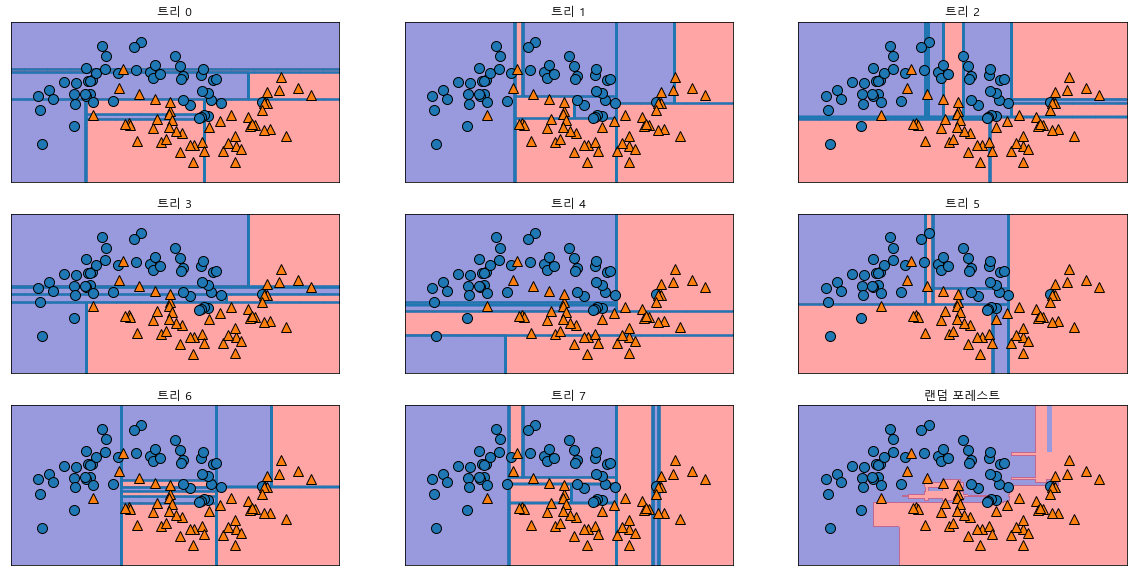

In [11]:
fig,axes = plt.subplots(3,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
forest.score(X_train,y_train)

1.0

In [15]:
forest.score(X_test,y_test)

0.965034965034965

아무런 매개변수 튜닝 없이 선형 모델이나 단일 결정 트리보다 높은 정확도를 보인다. 아래에서 보듯 랜덤 포레스트는 단일 트리보다 훨씬 많은 특성이 0 이상의 중요도를 갖는다.

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

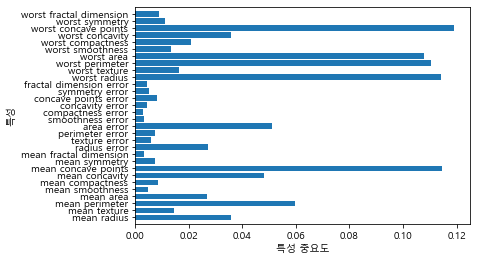

In [19]:
plot_feature_importances_cancer(forest)

장점이 매우 많지만 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형모델이 더 적합할 수 있다.또한 선형모델보다 많은 메모리를 사용하며 훈련과 예측이 느리다.

매개변수 : n_estimator(클수록 좋으나 메모리 소모가 많아짐), max_features(적게 하면 과대적합을 줄인다.),max_depth<br>
분류는 max_features=sqrt(n_features), 회귀는 max_features=n_features

## 그래디언트 부스팅 회귀 트리
회귀와 분류 모두에 사용할 수 있다.<br>
랜덤 포레스트와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦.<br>
무작위성이 없고 강력한 사전 가지치기를 사용. 보통 5개 이내의 트리를 사용하므로 메모리 소모가 적고 예측이 빠르다.

근본 아이디어는 얕은 트리 같은 간단한 모델(약한 학습기)을 많이 연결하는 것이다. <br>
각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아진다.

사전 가지치기나 트리 개수 외 중요 매개 변수 : learning_rate :  학습률이 크면 보정을 강하게 하므로 복잡한 모델을 만든다.
n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많이 생긴다.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
gbrt.score(X_train,y_train)

1.0

In [22]:
gbrt.score(X_test,y_test)

0.965034965034965

과대적합을 막기위해 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있다.

In [23]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
gbrt.score(X_train,y_train)

0.9906103286384976

In [25]:
gbrt.score(X_test,y_test)

0.972027972027972

In [26]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
gbrt.score(X_train,y_train)

0.9882629107981221

In [28]:
gbrt.score(X_test,y_test)

0.965034965034965

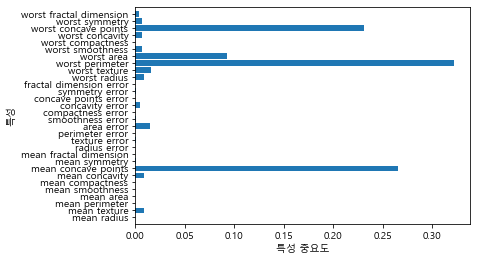

In [30]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

# 배깅, 엑스트라 트리, 에이다부스트

In [8]:
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state = 3)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(
Xm,ym,stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train,Xc_test,yc_train,yc_test = train_test_split(
cancer.data, cancer.target, random_state=0)

## 배깅
Bootstrap aggregating<br>
중복을 허용환 랜덤 샘플링으로 만든 훈련 세트를 사용해 분류기를 각기 다르게 학습시킴<br>
분류기가 predict_proba()메서드를 지원하는 경우 확률값을 평균하여 예측을 수행하며 그렇지 않은 분류기의 경우 가장 빈도 높은 클래스 레이블이 예측 결과가 된다.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# LogisticRegression 객체를 기반 분류기로 전달하고 훈련할 분류기의 개수는 100개로 지정
# oob_score = True로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가
# RandomForestClassifier도 oob_score 매개변수를 지원 (두 모델 모두 기본값은 False)
bagging = BaggingClassifier(LogisticRegression(),n_estimators=100, oob_score=True,n_jobs=-1,random_state=42)

In [10]:
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, ver

In [11]:
bagging.score(Xc_train,yc_train)

0.9577464788732394

In [12]:
bagging.score(Xc_test,yc_test)

0.958041958041958

In [13]:
bagging.oob_score_

0.9436619718309859

In [14]:
# 이번에는 선형회귀 대신 결정 트리로 배깅을 수행
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


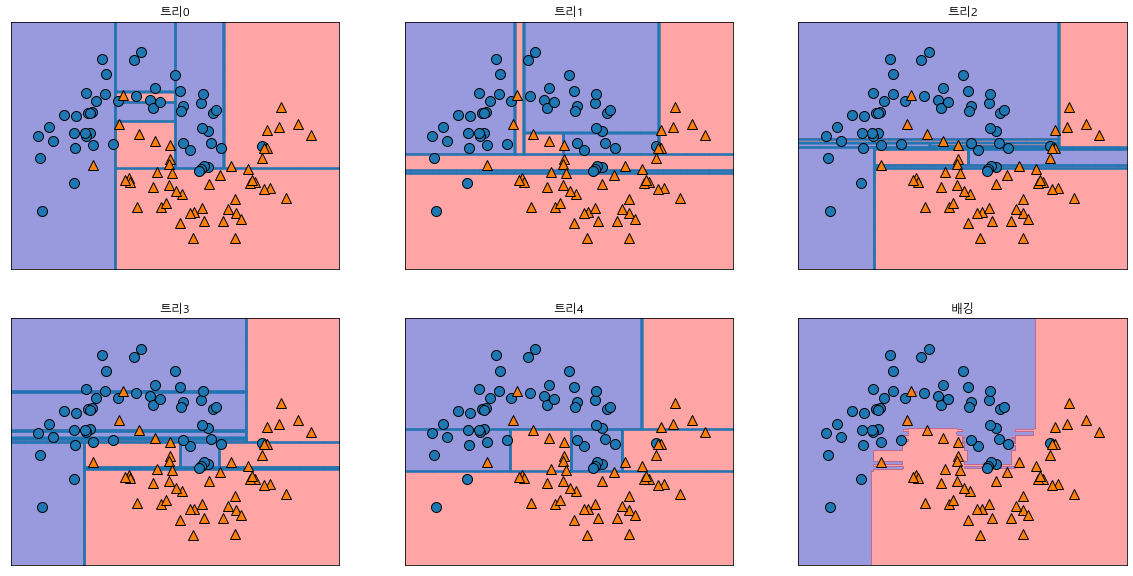

In [17]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [20]:
bagging.score(Xm_test,ym_test)

0.88

In [22]:
# n_estimators=100으로 늘려 cancer 셋에 훈련시킴

bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,
                           oob_score=True,n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [23]:
bagging.score(Xc_train,yc_train)

1.0

In [24]:
bagging.score(Xc_test,yc_test)

0.965034965034965

In [25]:
bagging.oob_score_

0.9507042253521126

## 엑스트라 트리
랜덤 포레스트와 달리 DecisionTreeClassifier(splitter='random')을 사용. 부트스트랩 샘플링을 적용하지 않음.<br>
무작위성을 증가시키면 모델의 편향이 늘어나지만 분산이 감소, 예측 방법은 랜덤포레스트와 마찬가지로 각 트리가 만든 확률값을 평균한다.

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5,n_jobs=-1,random_state=0)
xtree.fit(Xm_train,ym_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

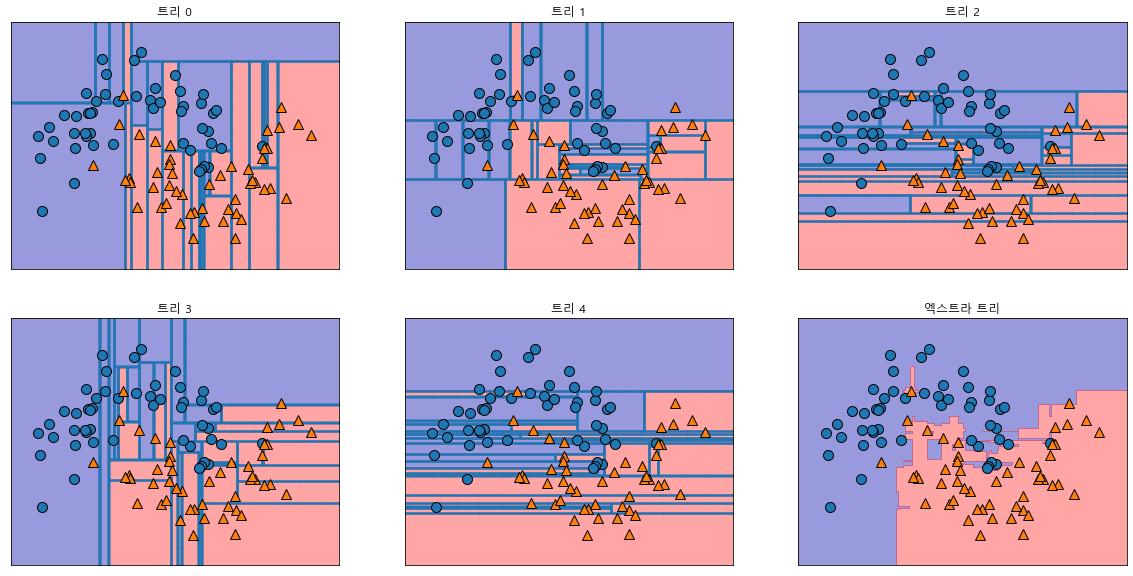

In [30]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(xtree,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [31]:
# 트리 개수가 100개
xtree = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0)
xtree.fit(Xc_train,yc_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [33]:
print(xtree.score(Xc_train,yc_train))
print(xtree.score(Xc_test,yc_test))

1.0
0.972027972027972


엑스트라 트리가 랜덤 포레스트보다 계산비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 종종 많은 트리를 만들어야하므로 랜덤 포레스트가 더 선호된다.

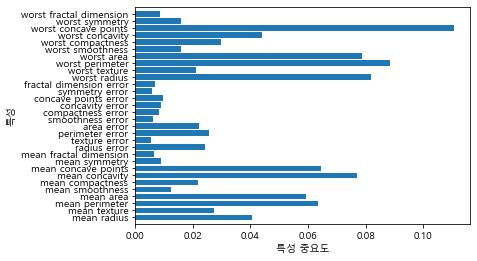

In [34]:
# 특성중요도의 시각화

n_features = cancer.data.shape[1]
plt.barh(range(n_features),xtree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()

## 에이다부스트
그래디언트 부스팅처럼 약한 학습기를 사용하지만 그래디언트 부스팅과 달리 이전 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킨다. 훈련된 모델은 성능에 따라 가중치가 부여되며 예측을 만들 때에는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택한다.

sklearn의 AdaBoostClassifier는 기본적으로 DecisionTreeClassifier(max_depth=1)을 사용하고 AdaBoodstRegressor(max_depth=3)을 사용한다.<br>그래디언트 부스팅과 마찬가지로 순차적으로 수행하기에 n_jobs 매개변수를 지원하지 않는다.

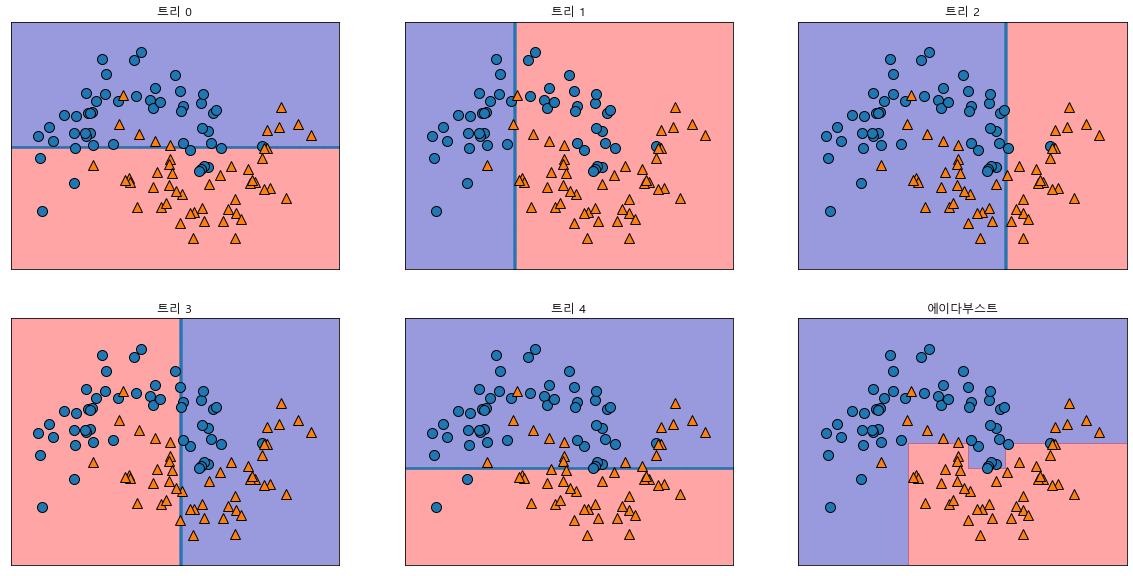

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

fit,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [37]:
ada = AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(Xc_train,yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [39]:
print(ada.score(Xc_train,yc_train))
print(ada.score(Xc_test,yc_test))

1.0
0.986013986013986


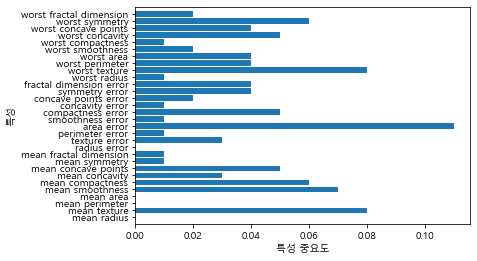

In [41]:
# 특성별 중요도
plt.barh(range(n_features),ada.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()